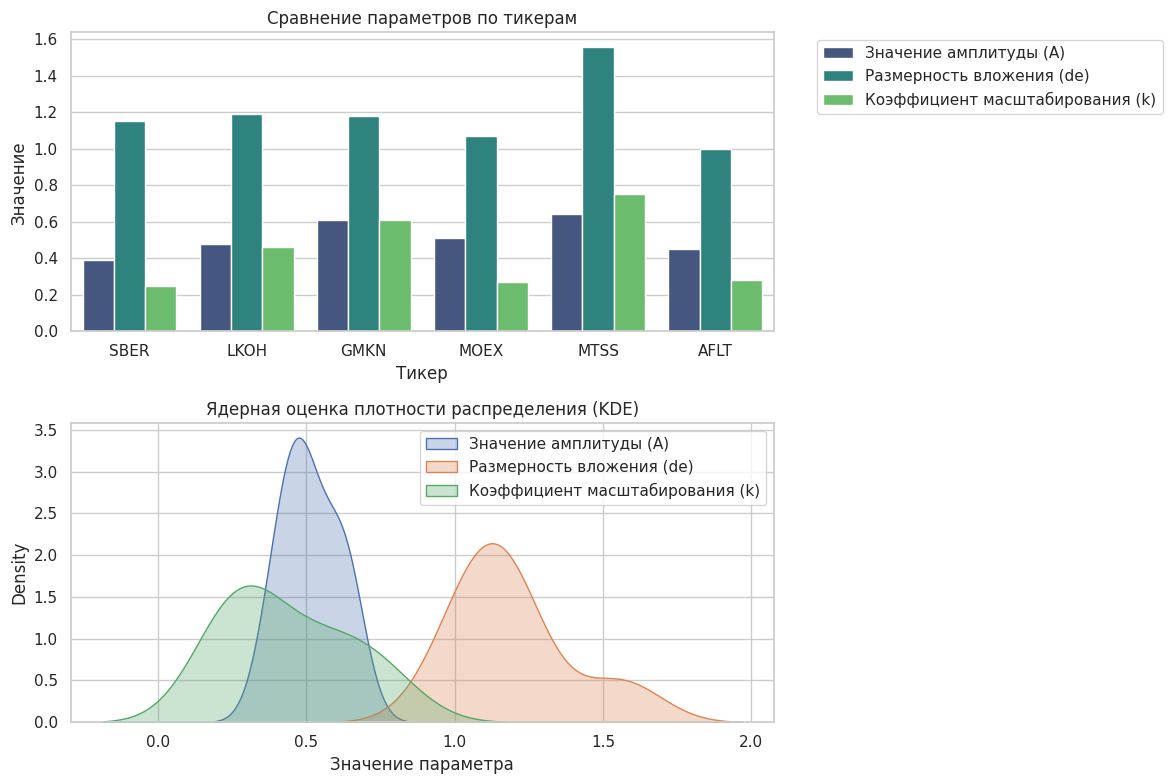

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Данные
data = {
    'Тикер': ['SBER', 'LKOH', 'GMKN', 'MOEX', 'MTSS', 'AFLT'],
    'Значение амплитуды (А)': [0.39, 0.48, 0.61, 0.51, 0.64, 0.45],
    'Размерность вложения (de)': [1.15, 1.19, 1.18, 1.07, 1.56, 1.00],
    'Коэффициент масштабирования (k)': [0.25, 0.46, 0.61, 0.27, 0.75, 0.28]
}

df = pd.DataFrame(data)

# Настройка стиля графиков
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8))

# График 1: Сравнение параметров по тикерам (столбчатая диаграмма)
plt.subplot(2, 1, 1)
df_melted = df.melt(id_vars='Тикер', var_name='Параметр', value_name='Значение')
sns.barplot(x='Тикер', y='Значение', hue='Параметр', data=df_melted, palette='viridis')
plt.title('Сравнение параметров по тикерам')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# График 2: Плотность распределения параметров (KDE)
plt.subplot(2, 1, 2)
for column in df.columns[1:]:
    sns.kdeplot(df[column], label=column, fill=True, alpha=0.3)
plt.title('Ядерная оценка плотности распределения (KDE)')
plt.xlabel('Значение параметра')
plt.legend()

plt.tight_layout()
plt.show()

<ipython-input-3-bbb3d202b0f5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df.melt(id_vars='Тикер'), x='variable', y='value', palette='viridis', inner='quartile')


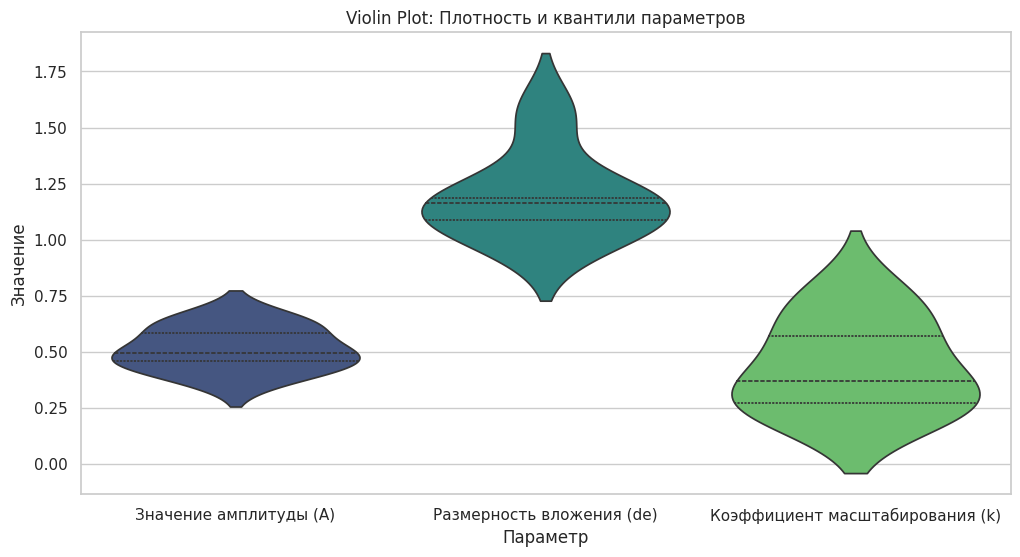

In [3]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df.melt(id_vars='Тикер'), x='variable', y='value', palette='viridis', inner='quartile')
plt.title('Violin Plot: Плотность и квантили параметров')
plt.xlabel('Параметр')
plt.ylabel('Значение')
plt.show()

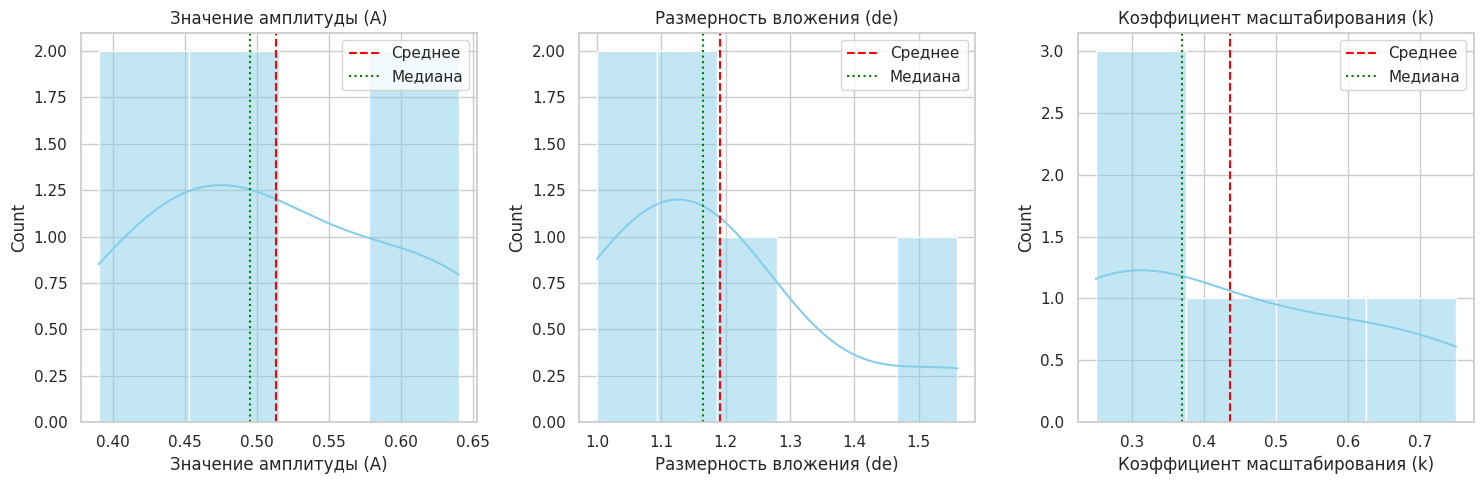

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
params = ['Значение амплитуды (А)', 'Размерность вложения (de)', 'Коэффициент масштабирования (k)']
for i, param in enumerate(params):
    sns.histplot(df[param], kde=True, ax=axes[i], color='skyblue')
    axes[i].axvline(df[param].mean(), color='red', linestyle='--', label='Среднее')
    axes[i].axvline(df[param].median(), color='green', linestyle=':', label='Медиана')
    axes[i].set_title(param)
    axes[i].legend()
plt.tight_layout()
plt.show()

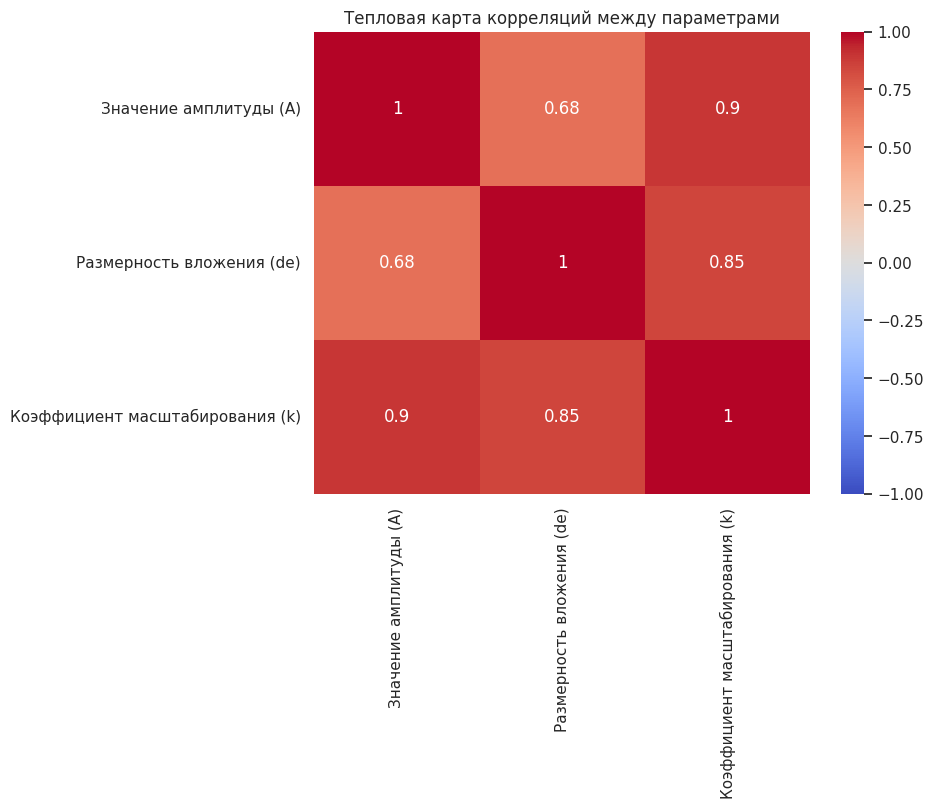

In [6]:
corr_matrix = df.drop(columns='Тикер').corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Тепловая карта корреляций между параметрами')
plt.show()

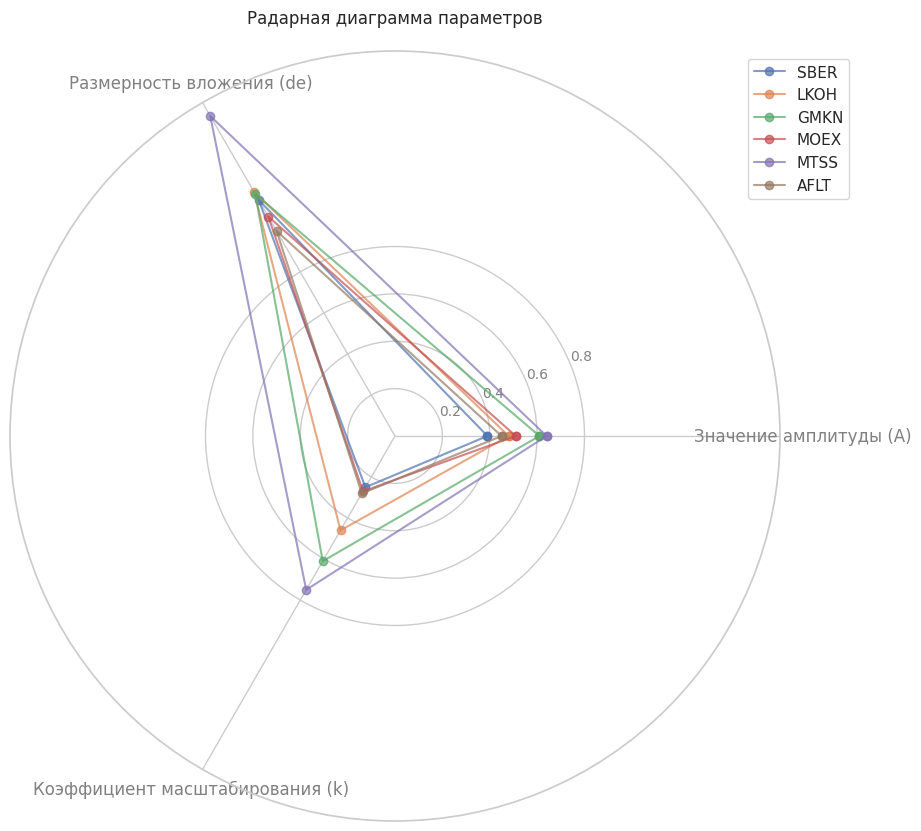

In [7]:
from math import pi

categories = list(df.columns[1:])
N = len(categories)
angles = [n / N * 2 * pi for n in range(N)]
angles += angles[:1]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, polar=True)

for _, row in df.iterrows():
    values = row[1:].tolist()
    values += values[:1]
    ax.plot(angles, values, label=row['Тикер'], marker='o', linestyle='-', alpha=0.7)

plt.xticks(angles[:-1], categories, color='grey', size=12)
plt.yticks([0.2, 0.4, 0.6, 0.8], color='grey', size=10)
plt.title('Радарная диаграмма параметров', pad=20)
plt.legend(bbox_to_anchor=(1.1, 1))
plt.show()